In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
np.random.seed(1)
X = np.random.rand(2, 10).T
y = np.array([1, -1, -1, -1, -1, -1, 1, 1, 1, 1]) #, -1, 1])
y = 1*(y==1)

In [4]:
# X = np.vstack([X, np.array([[0.6, 0.8], [0.6, 0.4]])])

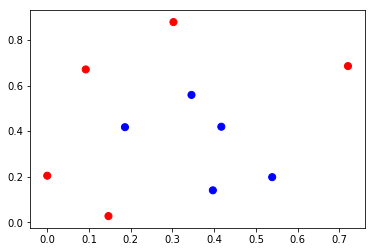

In [5]:
def plot_data(X, y, w=None, y_neg=0):
    if w is None:
        w = np.array([1/len(y)]*len(y))
    plt.scatter(X[y==1, 0], X[y==1, 1], c='b', s=w[y==1]*500)
    plt.scatter(X[y==y_neg, 0], X[y==y_neg, 1], c='r', s=w[y==y_neg]*500)
    plt.show()
plot_data(X, y)

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import reg_helper as RHelper

Using TensorFlow backend.


In [7]:
dt_clf_1 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=2)

In [8]:
dt_clf_1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

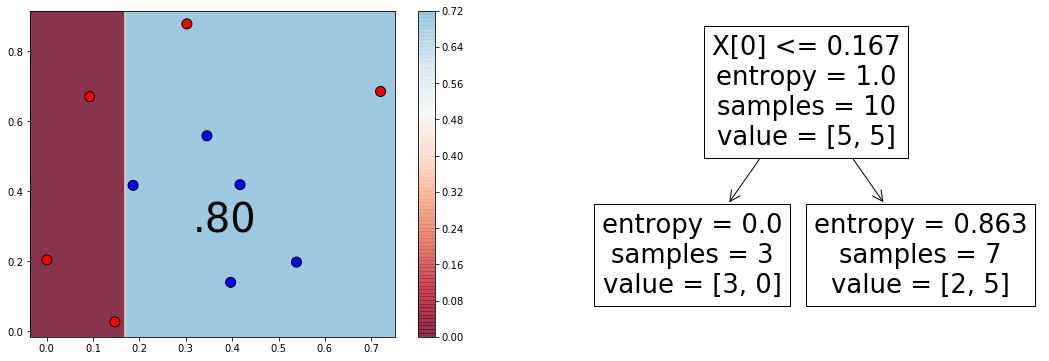

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
RHelper.plot_boundaries(X, y, dt_clf_1.score(X, y), dt_clf_1.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
plot_tree(dt_clf_1, ax=ax2)
plt.show()

In [41]:
print(dt_clf_1.predict_proba(X)[:,0])

[0.28571429 0.28571429 1.         0.28571429 1.         1.
 0.28571429 0.28571429 0.28571429 0.28571429]


In [37]:
2/7

0.2857142857142857

In [10]:
predicted_as_one_indexes = np.where(dt_clf_1.predict(X) == 1)
FPs = (y[predicted_as_one_indexes] == 0).sum()
FPs/len(predicted_as_one_indexes[0])

0.2857142857142857

In [11]:
rojos = 2/7
azules = 5/7
print(rojos, azules)
print('Entropía:', - rojos*np.log2(rojos) - azules*np.log2(azules))

0.2857142857142857 0.7142857142857143
Entropía: 0.863120568566631


Pesos iniciales:
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
predicciones y errores:
[1 1 0 1 0 0 1 1 1 1]
[0 1 0 1 0 0 0 0 0 0]
error: 0.2
alpha: 1.3862943611198906
Pesos recalculados con el error:
[0.1 0.4 0.1 0.4 0.1 0.1 0.1 0.1 0.1 0.1]
Pesos normalizados:
[0.0625 0.25   0.0625 0.25   0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]


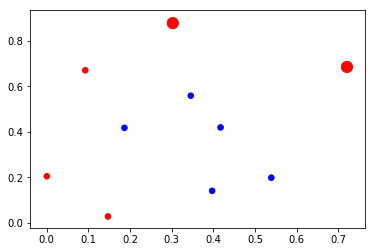

In [49]:
def calculate_adaboost(X, y, weights, dt_clf, lr=1.0):
    print('Pesos iniciales:')
    print(weights)
    predictions = dt_clf.predict(X)
    print(f'predicciones y errores:')
    print(predictions)
    errors = (predictions != y) * 1
    print(errors)
    p = np.sum((predictions != y) * weights)
    print(f'error: {p}')
    say_amount = lr*np.log((1-p)/p)
    print(f'alpha: {say_amount}')

    weights = weights*np.exp(say_amount*errors)
    print('Pesos recalculados con el error:')
    print(weights)
    print('Pesos normalizados:')
    weights = weights/weights.sum()
    print(weights)
    plot_data(X, y, weights)
    plt.show()
    return weights, say_amount
weights_1 = np.array([1/len(X)]*len(X))
weights_2, alpha_1 = calculate_adaboost(X, y, weights_1, dt_clf_1, lr=1)

In [50]:
dt_clf_2 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_clf_2.fit(X, y, sample_weight=weights_2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
# Entropia de nodo raiz
# de las rojas tengo 2 observaciones con peso 0.25 y 3 con 0.0625
# De las azules todas 0.025
rojas = 0.25 * 2 + 3 * 0.0625 
azules = 5 * 0.0625 
print(rojas, azules)
print('Entropía:', - rojas*np.log2(rojas) - azules*np.log2(azules))

0.6875 0.3125
Entropía: 0.8960382325345573


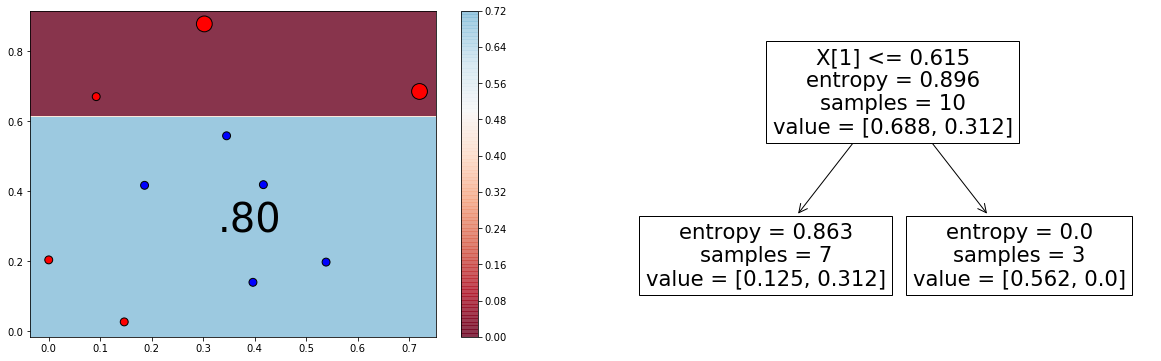

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf_2.score(X, y), dt_clf_2.predict_proba,  mesh_res=200, ax=ax1, bound_line=False, sample_weights=weights_2)
plot_tree(dt_clf_2, ax=ax2)
plt.show()

In [58]:
np.log((1-0.125)/0.125)

1.9459101490553132

Pesos iniciales:
[0.0625 0.25   0.0625 0.25   0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
predicciones y errores:
[1 0 1 0 1 0 1 1 1 1]
[0 0 1 0 1 0 0 0 0 0]
error: 0.125
alpha: 1.9459101490553132
Pesos recalculados con el error:
[0.0625 0.25   0.4375 0.25   0.4375 0.0625 0.0625 0.0625 0.0625 0.0625]
Pesos normalizados:
[0.03571429 0.14285714 0.25       0.14285714 0.25       0.03571429
 0.03571429 0.03571429 0.03571429 0.03571429]


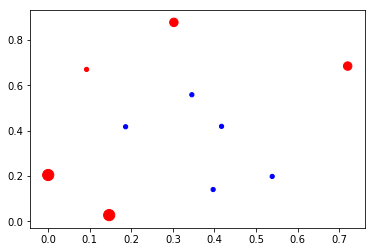

In [59]:
weights_3, alpha_2 = calculate_adaboost(X, y, weights_2, dt_clf_2)

In [17]:
dt_clf_3 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_clf_3.fit(X, y, sample_weight=weights_3)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

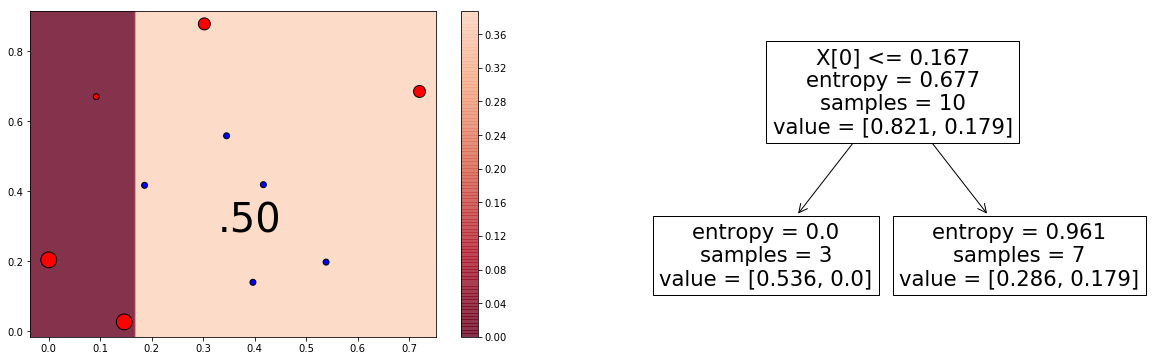

In [60]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf_3.score(X, y), dt_clf_3.predict_proba,  mesh_res=200, ax=ax1, bound_line=False, sample_weights=weights_3)
plot_tree(dt_clf_3, ax=ax2)
plt.show()

In [62]:
dt_clf_3.predict_proba(X)[:,0]

[0.61538462 0.61538462 1.         0.61538462 1.         1.
 0.61538462 0.61538462 0.61538462 0.61538462]


In [35]:
0.286/(0.286 + 0.179)

0.6150537634408602

In [64]:
0.03571429*5

0.17857145000000002

Pesos iniciales:
[0.03571429 0.14285714 0.25       0.14285714 0.25       0.03571429
 0.03571429 0.03571429 0.03571429 0.03571429]
predicciones y errores:
[0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 1 1 1]
error: 0.17857142857142855
alpha: 1.5260563034950494
Pesos recalculados con el error:
[0.16428571 0.14285714 0.25       0.14285714 0.25       0.03571429
 0.16428571 0.16428571 0.16428571 0.16428571]
Pesos normalizados:
[0.1        0.08695652 0.15217391 0.08695652 0.15217391 0.02173913
 0.1        0.1        0.1        0.1       ]


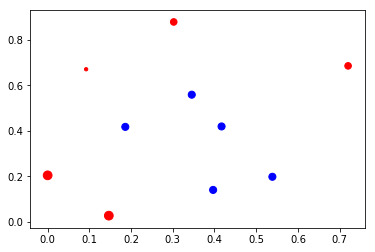

In [63]:
weights_4, alpha_3 = calculate_adaboost(X, y, weights_3, dt_clf_3)

# Con libreria

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, criterion='entropy'), 
                             n_estimators=3, algorithm='SAMME', learning_rate=1)

In [95]:
ada_clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

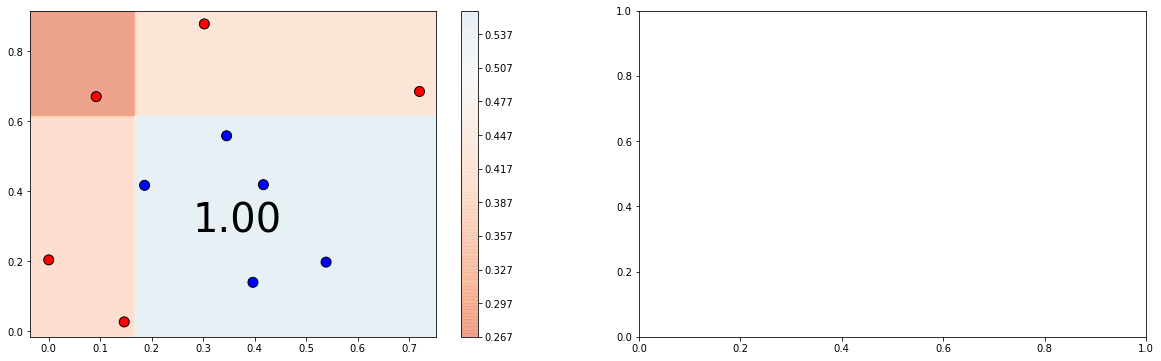

In [96]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, ada_clf.score(X, y), ada_clf.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
plt.show()

In [24]:
ada_clf.estimator_weights_

array([1.38629436, 1.94591015, 1.5260563 ])

In [66]:
(dt.predict(X)-0.5)*2

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

[ 1.386  1.386 -1.386  1.386 -1.386 -1.386  1.386  1.386  1.386  1.386]


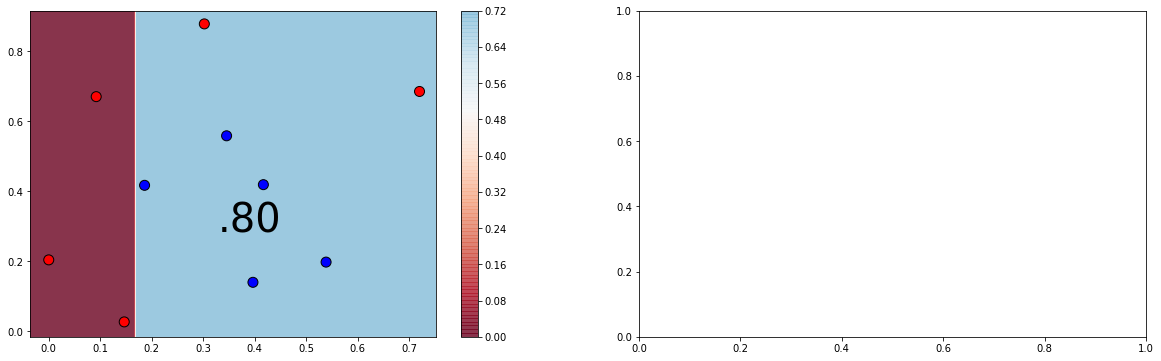

[ 1.945 -1.945  1.945 -1.945  1.945 -1.945  1.945  1.945  1.945  1.945]


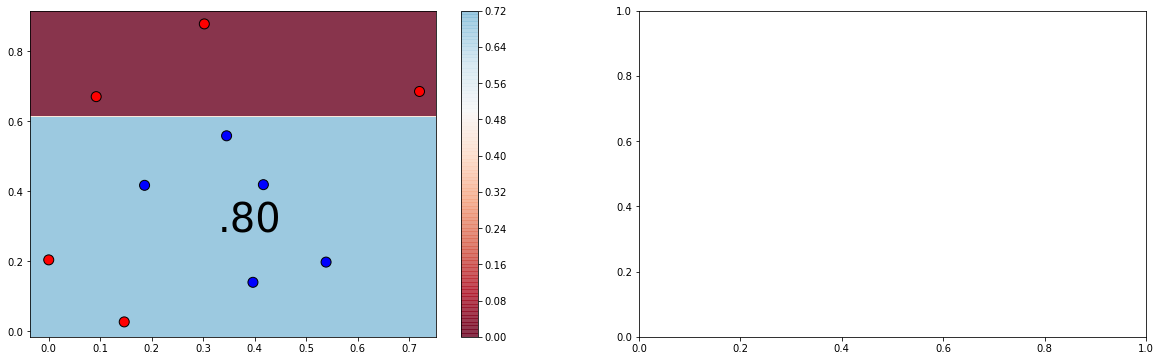

[-1.526 -1.526 -1.526 -1.526 -1.526 -1.526 -1.526 -1.526 -1.526 -1.526]


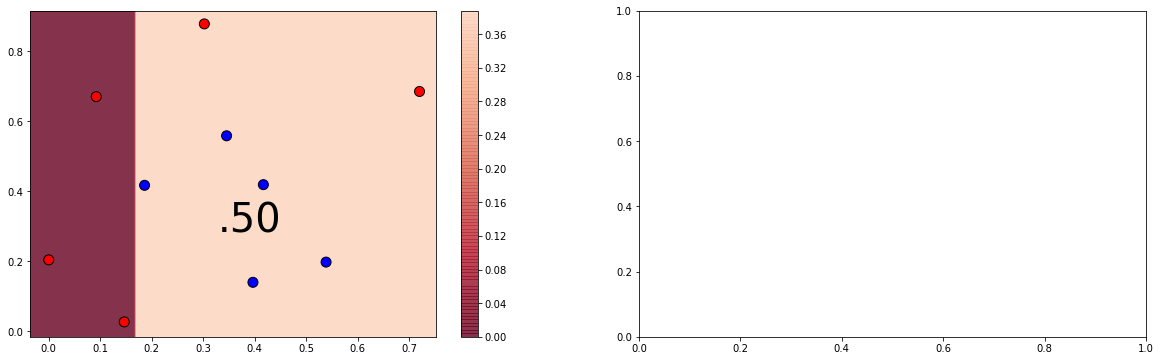

_______________________________________________________________________
[ 1.806 -2.085 -0.966 -2.085 -0.966 -4.858  1.806  1.806  1.806  1.806]
[1 0 0 0 0 0 1 1 1 1]
[1 0 0 0 0 0 1 1 1 1]


In [93]:
pred_res = 0
for i in range(len(ada_clf.estimators_)):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    dt = ada_clf.estimators_[i]
    print(np.array((ada_clf.estimator_weights_[i]*(dt.predict(X)-0.5)*2)*1000, dtype=int)/1000)
    pred_res=pred_res + ada_clf.estimator_weights_[i]*(dt.predict(X)-0.5)*2
    RHelper.plot_boundaries(X, y, dt.score(X, y), dt.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
    plt.show()
print('_______________________________________________________________________')
print(np.array(pred_res*1000, dtype=int)/1000)
print(1*(pred_res>0))
print(y)

In [70]:
(pred_res>0) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [212]:
pred_2 = (alpha_1 * (dt_clf_1.predict(X) == 1) >= alpha_2 * (dt_clf_2.predict(X) == 1))*1

In [213]:
pred_2

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

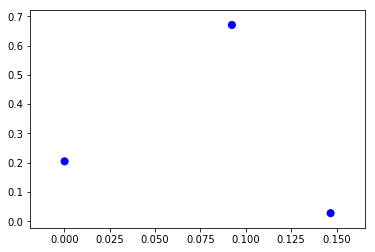

In [214]:
plot_data(X, pred_2)

In [204]:
alpha_2 * (dt_clf_2.predict(X) == 1)

array([2.94443898, 2.94443898, 0.        , 2.94443898, 0.        ,
       0.        , 2.94443898, 2.94443898, 2.94443898, 2.94443898])

In [181]:
dt_clf_3 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_clf_3.fit(X, y, sample_weight=weights_3)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

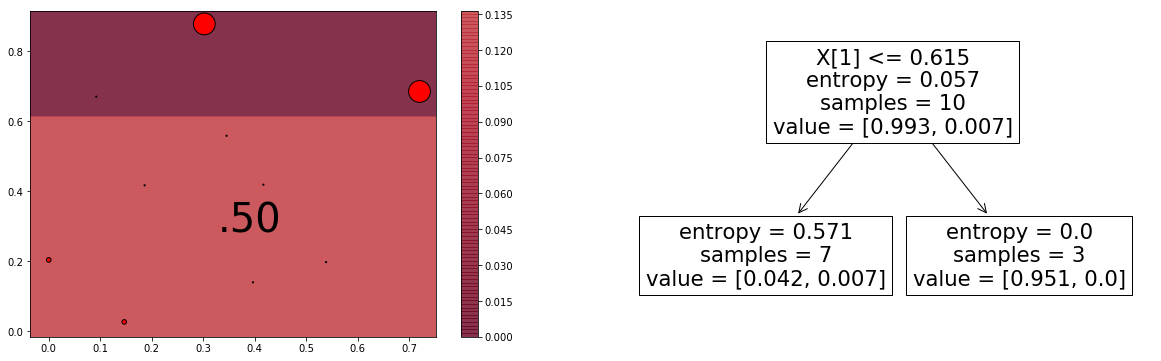

In [184]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf_3.score(X, y), dt_clf_3.predict_proba,  mesh_res=200, ax=ax1, bound_line=False, sample_weights=weights_3)
plot_tree(dt_clf_3, ax=ax2)
plt.show()

In [180]:
np.random.seed(42)
samples = np.random.choice(range(len(X)), size=len(X) ,p=weights)
print(samples)

[2 8 4 4 2 2 2 4 4 4]


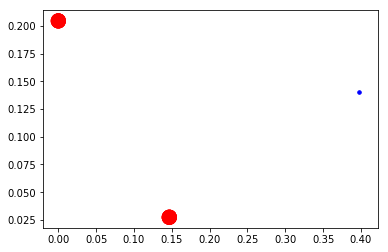

In [27]:
plot_data(X[samples], y[samples], weights[samples])

In [11]:
dt_clf_2 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_clf_2.fit(X[samples], y[samples])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

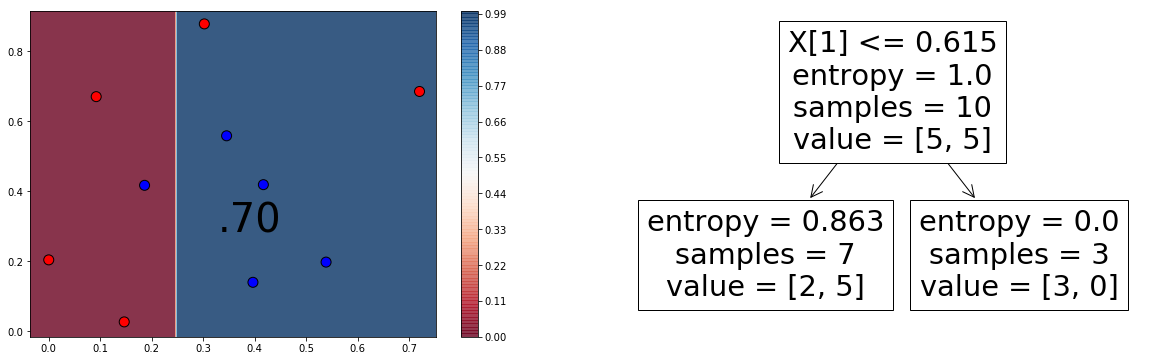

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf_2.score(X, y), dt_clf_2.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
plot_tree(dt_clf, ax=ax2)
plt.show()

Pesos iniciales:
[0.0625 0.0625 0.25   0.0625 0.25   0.0625 0.0625 0.0625 0.0625 0.0625]
predicciones y errores:
[ 1  1 -1  1 -1 -1 -1  1  1  1]
[ 1 -1  1 -1  1  1 -1  1  1  1]
error: 0.1875
alpha: 0.7331685343967135
Pesos recalculados con el error:
[0.03002403 0.13010412 0.12009612 0.13010412 0.12009612 0.03002403
 0.13010412 0.03002403 0.03002403 0.03002403]
Pesos normalizados:
[0.03846154 0.16666667 0.15384615 0.16666667 0.15384615 0.03846154
 0.16666667 0.03846154 0.03846154 0.03846154]


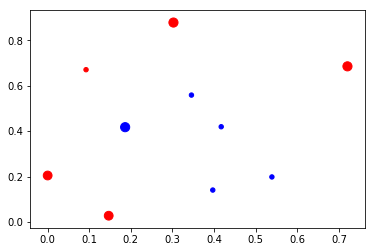

In [13]:
weights, alpha2 = calculate_adaboost(X, y, weights, dt_clf_2)

In [14]:
np.random.seed(18)
samples = np.random.choice(range(len(X)), size=len(X) ,p=weights)
print(samples)

[4 3 6 1 6 6 4 9 2 0]


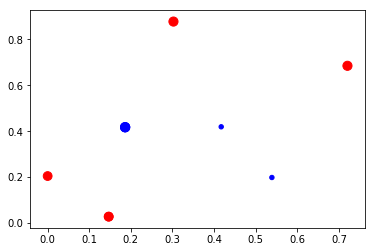

In [15]:
plot_data(X[samples], y[samples], weights[samples])

In [145]:
dt_clf_3 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_clf_3.fit(X[samples], y[samples])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

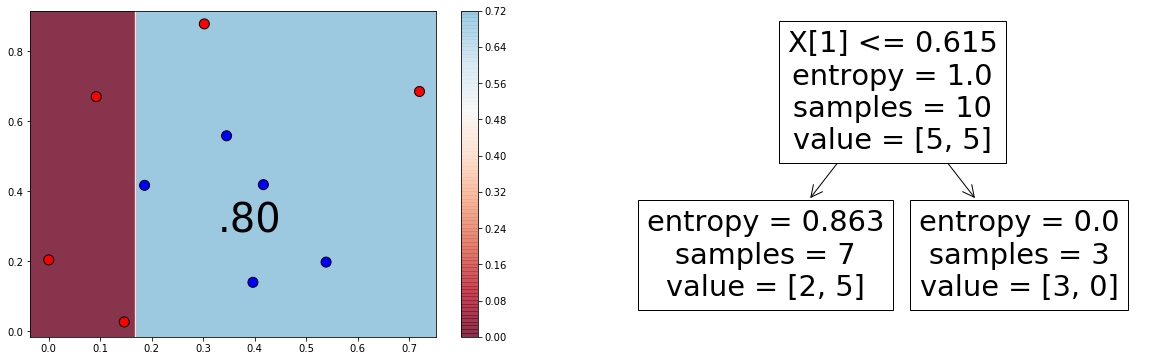

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf_3.score(X, y), dt_clf_3.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
plot_tree(dt_clf, ax=ax2)
plt.show()

In [147]:
say_amount*dt_clf.predict(X) + say_amount_2*dt_clf_2.predict(X)>0

array([ True,  True, False,  True, False, False, False,  True,  True,
        True])

In [48]:
predict_1 = dt_clf.predict(X)
predict_2 = dt_clf_2.predict(X)
print(predict_1*say_amount)
print(predict_2*say_amount_2)
print(2*((say_amount*(predict_1==1) + (predict_2==1)*say_amount_2)>0) - 1)
print(y)

[ 0.69314718 -0.69314718  0.69314718 -0.69314718  0.69314718 -0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718]
[ 0.73316853  0.73316853 -0.73316853  0.73316853 -0.73316853 -0.73316853
 -0.73316853  0.73316853  0.73316853  0.73316853]
[ 1  1  1  1  1 -1  1  1  1  1]
[ 1 -1 -1 -1 -1 -1  1  1  1  1]


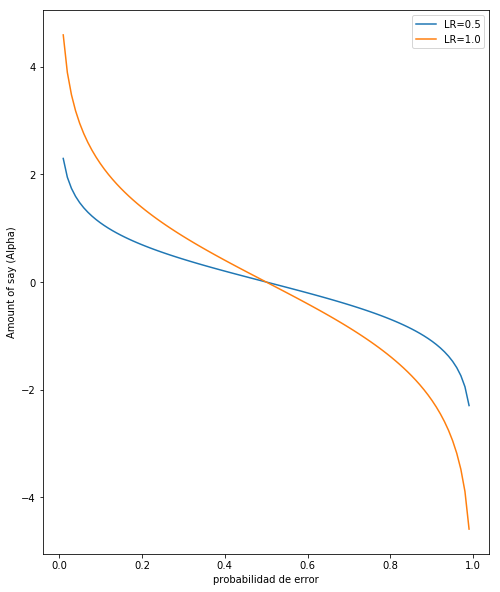

In [48]:
plt.figure(figsize=(8, 10))
t = np.linspace(0.01, 0.99, 100)
plt.plot(t, 0.5*np.log((1-t)/t), label='LR=0.5')
plt.plot(t, 1*np.log((1-t)/t), label='LR=1.0')
plt.xlabel('probabilidad de error')
plt.ylabel('Amount of say (Alpha)')
plt.legend()
plt.show()